In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.table import Table, join, Column
from astropy.stats import LombScargle
import astropy.units as u                          # We'll need this later.

from astropy.io import ascii
import glob, re, copy

import lightkurve
from lightkurve import KeplerLightCurveFile, KeplerLightCurve
from hot_utils import *

% matplotlib inline

import matplotlib as mpl
mpl.style.use('seaborn-colorblind')

#To make sure we have always the same matplotlib settings
#(the ones in comments are the ipython notebook settings)

mpl.rcParams['figure.figsize']=(12.0,9.0)    #(6.0,4.0)
mpl.rcParams['font.size']=20               #10 
mpl.rcParams['savefig.dpi']= 200             #72 
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
from matplotlib import rc

colours = mpl.rcParams['axes.prop_cycle'].by_key()['color']


### Load a hot Kepler object - an oscillating star with a putative planet as found by [Sowicka et al](http://adsabs.harvard.edu/abs/2017MNRAS.467.4663S), 2017.

Loading light curve for KIC 8197761...


/anaconda3/lib/python3.7/site-packages/lightkurve/lightcurvefile.py:218: LightkurveWarning: `LightCurveFile.from_archive()` is deprecated and will be removed soon, please use `lightkurve.search_lightcurvefile()` instead.
  LightkurveWarning)


Loaded!
Running CLEAN
Subtracted 143 sine waves
Cleaned!
Correcting with CBVs...
Corrected with CBVs!
Doing Transit Search...


/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


Transit search done!
Time elapsed: 156.77 s


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Done


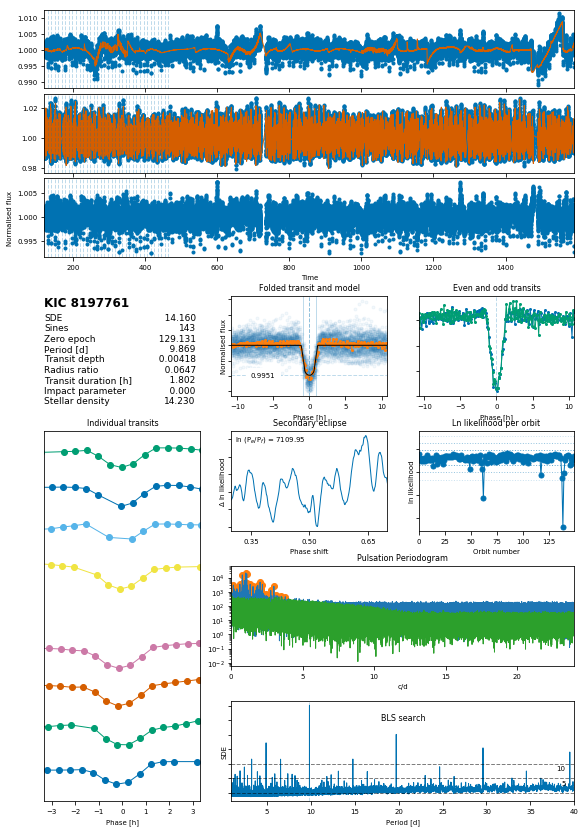

In [2]:
do_all(8197761)

Loading light curve for KIC 5613330...


/anaconda3/lib/python3.7/site-packages/lightkurve/lightcurvefile.py:218: LightkurveWarning: `LightCurveFile.from_archive()` is deprecated and will be removed soon, please use `lightkurve.search_lightcurvefile()` instead.
  LightkurveWarning)


Loaded!
Running CLEAN
Subtracted 5 sine waves
Cleaned!
Correcting with CBVs...
Corrected with CBVs!
Doing Transit Search...


/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


Transit search done!
Time elapsed: 63.84 s


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Done


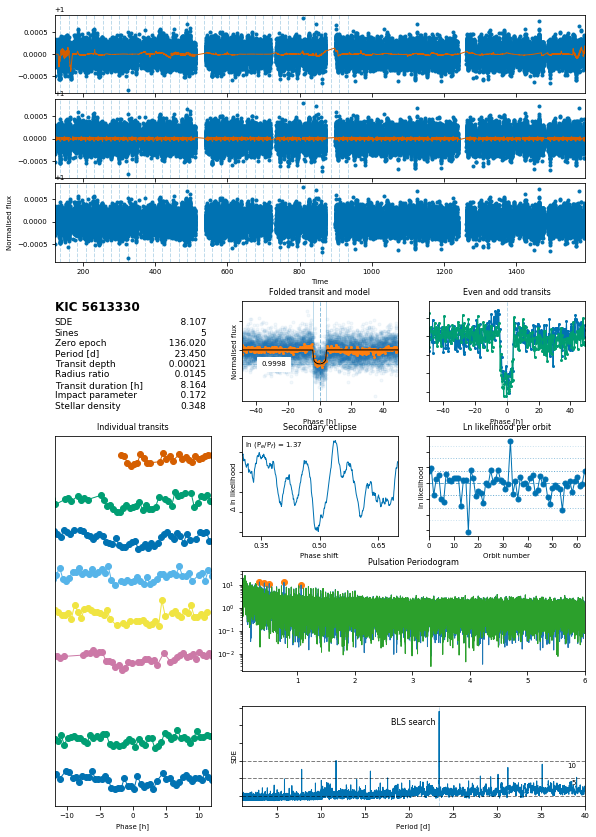

In [10]:
do_all(5613330)

In [2]:
do_all(6671321)

Loading light curve for KIC 6671321...


/anaconda3/lib/python3.7/site-packages/lightkurve/lightcurvefile.py:218: LightkurveWarning: `LightCurveFile.from_archive()` is deprecated and will be removed soon, please use `lightkurve.search_lightcurvefile()` instead.
  LightkurveWarning)


Loaded!
Running CLEAN
Subtracted 61 sine waves
Cleaned!
Correcting with CBVs...
Missing CBV 0
Missing CBV 1
Missing CBV 2
Missing CBV 3
Missing CBV 4
Missing CBV 5
Missing CBV 6
Missing CBV 7
Missing CBV 8
Missing CBV 9
Missing CBV 10
Missing CBV 11
Missing CBV 12
Missing CBV 13
Missing CBV 14
Missing CBV 15


/anaconda3/lib/python3.7/site-packages/oxksc/cbvc/cbv.py:25: RuntimeWarning: invalid value encountered in true_divide
  Bnorm /= Bs


ValueError: array must not contain infs or NaNs

In [13]:
lcs = KeplerLightCurveFile.from_archive(9054553,cadence='long')
# 

/anaconda3/lib/python3.7/site-packages/lightkurve/lightcurvefile.py:218: LightkurveWarning: `LightCurveFile.from_archive()` is deprecated and will be removed soon, please use `lightkurve.search_lightcurvefile()` instead.
  LightkurveWarning)


In [12]:
# search = lightkurve.search_lightcurvefile(4283747)
search = lightkurve.search_lightcurvefile(9054553)

In [9]:
lightkurve.search

SearchResult containing 18 data products.

  obsID     target_name            productFilename                        description             distance
---------- ------------- ------------------------------------ ----------------------------------- --------
9000026972 kplr010451090 kplr010451090-2009131105131_llc.fits  Lightcurve Long Cadence (CLC) - Q0      0.0
9000026972 kplr010451090 kplr010451090-2009166043257_llc.fits  Lightcurve Long Cadence (CLC) - Q1      0.0
9000026972 kplr010451090 kplr010451090-2009259160929_llc.fits  Lightcurve Long Cadence (CLC) - Q2      0.0
9000026972 kplr010451090 kplr010451090-2009350155506_llc.fits  Lightcurve Long Cadence (CLC) - Q3      0.0
9000026972 kplr010451090 kplr010451090-2010078095331_llc.fits  Lightcurve Long Cadence (CLC) - Q4      0.0
9000026972 kplr010451090 kplr010451090-2010174085026_llc.fits  Lightcurve Long Cadence (CLC) - Q5      0.0
9000026972 kplr010451090 kplr010451090-2010265121752_llc.fits  Lightcurve Long Cadence (CLC) - Q6    

In [38]:
search

SearchResult containing 14 data products.

  obsID     target_name            productFilename                        description             distance
---------- ------------- ------------------------------------ ----------------------------------- --------
9000105494 kplr004283747 kplr004283747-2009166043257_llc.fits  Lightcurve Long Cadence (CLC) - Q1      0.0
9000105494 kplr004283747 kplr004283747-2009259160929_llc.fits  Lightcurve Long Cadence (CLC) - Q2      0.0
9000105494 kplr004283747 kplr004283747-2009350155506_llc.fits  Lightcurve Long Cadence (CLC) - Q3      0.0
9000105494 kplr004283747 kplr004283747-2010078095331_llc.fits  Lightcurve Long Cadence (CLC) - Q4      0.0
9000105494 kplr004283747 kplr004283747-2010174085026_llc.fits  Lightcurve Long Cadence (CLC) - Q5      0.0
9000105494 kplr004283747 kplr004283747-2010355172524_llc.fits  Lightcurve Long Cadence (CLC) - Q7      0.0
9000105494 kplr004283747 kplr004283747-2011073133259_llc.fits  Lightcurve Long Cadence (CLC) - Q8    

In [10]:
search._default_download_dir()

'/Users/benjaminpope/.lightkurve-cache'

In [41]:
ls /Users/benjaminpope/.lightkurve-cache/mastDownload/Kepler/*4283747*

ls: /Users/benjaminpope/.lightkurve-cache/mastDownload/Kepler/*4283747*: No such file or directory
